In [2]:
#IMPORTING NECESSARY PYTHON PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA SET INFORMATION:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

ATTRIBUTE INFORMATION:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [34]:
data=pd.read_csv('online_shoppers_intention.csv')

In [35]:
#DATA PREPROCESSING OR DATA CLEANING

In [36]:
data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [37]:
#The dataset consists of 10 numerical and 8 categorical attributes.
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Data types for the existing columns are checked and categorical features which are of int64 are converted as object data type

In [38]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Converting the data types of  categorical columns with more than 2 values  as object

In [39]:
for i in ['OperatingSystems','Browser','Region','TrafficType','VisitorType',]:
    data[i]=data[i].astype('object')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null object
Browser                    12330 non-null object
Region                     12330 non-null object
TrafficType                12330 non-null object
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dty

Checking for NA values in the data and dropping them since NA count is very less 

In [41]:
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [42]:
data=data.dropna()

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Weekend','Revenue']:
    data[i]=le.fit_transform(data[i])

In [44]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,0.232624,0.154920
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.422522,0.361844
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,0.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000,1.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null object
Browser                    12316 non-null object
Region                     12316 non-null object
TrafficType                12316 non-null object
VisitorType                12316 non-null object
Weekend                    12316 non-null int64
Revenue                    12316 non-null int64
d

New features are created for the categorical featues using pd.get_dummies

In [46]:
data=pd.get_dummies(data)

In [47]:
print(len(data.columns))
print(data.columns)

75
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6'

Checking for variance in Numerical Features

In [48]:
num_column=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
data_variance=[]
for i in num_column:
    data_variance.append(data[i].var())


In [49]:
data_variance

[11.040693356184047,
 31279.612416369433,
 1.6146816930848196,
 19831.81564532657,
 1979.3902862989419,
 3664822.1103087845,
 0.00234518677639177,
 0.0023548988288224597,
 345.1393266296222]

Features Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration have high variance data 

DETECTING OUTLIERS IN ADMINISTRATIVE DURATION,INFORMATIONAL DURATION,PRODUCT RELATED,PRODUCT RELATED DURATION  

Instead of dropping the outliers ,the value of these outliers are imputed by the mean of their respective features.The following values imputed can be obtained from data.describe().By the definition of outliers interms of Z-score any value greater than 3 will be treated as an outlier.

In [50]:
outlier_column=['Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration']

In [51]:
from scipy import stats
z_score = np.abs(stats.zscore(data.ProductRelated_Duration))
threshold = 3
a_product=np.where(z_score > 3)
for i in a_product[0]:
    data.ProductRelated_Duration.iloc[i]=1196.037057

In [52]:
z_score_Administrative_Duration=np.abs(stats.zscore(data.ProductRelated))
a_Administrative_Duration=np.where(z_score_Administrative_Duration> 3)
for i in a_Administrative_Duration[0]:
    data.Administrative_Duration.iloc[i]=80.906176

In [53]:
z_score_ProductRelated=np.abs(stats.zscore(data.ProductRelated))
a_ProductRelated=np.where(z_score_ProductRelated> 3)
for i in a_ProductRelated[0]:
    data.ProductRelated.iloc[i]=31.763884

In [54]:
z_score_Informational_Duration = np.abs(stats.zscore(data.Informational_Duration))
a_product_Informational_Duration=np.where(z_score_Informational_Duration > 3)
for i in a_product_Informational_Duration[0]:
    data.Informational_Duration.iloc[i]=34.506387

In [55]:
data.var()

Administrative                   1.104069e+01
Administrative_Duration          2.702344e+04
Informational                    1.614682e+00
Informational_Duration           3.504453e+03
ProductRelated                   8.628774e+02
ProductRelated_Duration          1.478024e+06
BounceRates                      2.345187e-03
ExitRates                        2.354899e-03
PageValues                       3.451393e+02
SpecialDay                       3.960877e-02
Weekend                          1.785247e-01
Revenue                          1.309307e-01
Month_Aug                        3.392422e-02
Month_Dec                        1.205711e-01
Month_Feb                        1.471791e-02
Month_Jul                        3.384872e-02
Month_June                       2.283925e-02
Month_Mar                        1.301448e-01
Month_May                        1.985141e-01
Month_Nov                        1.841833e-01
Month_Oct                        4.259259e-02
Month_Sep                        3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DE1AA50F0>,
      dtype=object)

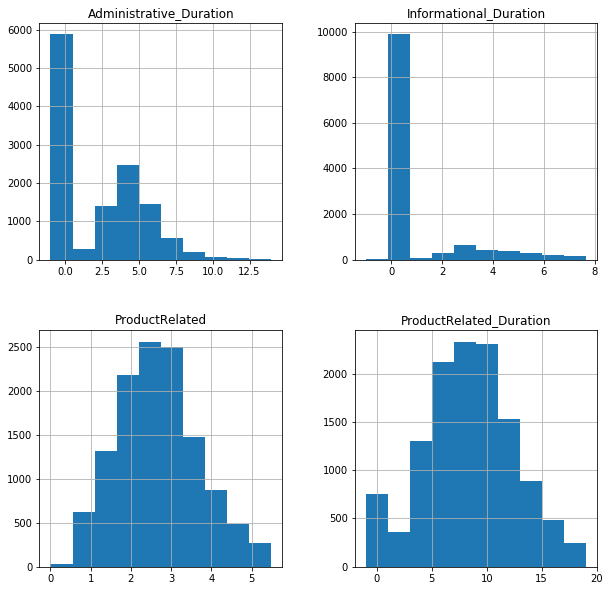

In [64]:
#Checking the distribution of the data and are observed to be Positively skewed
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
data.hist(column=['ProductRelated_Duration','Informational_Duration','Administrative_Duration','ProductRelated'],ax=ax)

In [57]:
#Changing the distribution of the data to be nearly symmetrical distribution
data.ProductRelated_Duration=np.cbrt(data.ProductRelated_Duration)
data.Informational_Duration=np.cbrt(data.Informational_Duration)
data.Administrative_Duration=np.cbrt(data.Administrative_Duration)
data.ProductRelated =np.cbrt(data.ProductRelated )


In [58]:
data_variance3=[]
for i in num_column:
    data_variance3.append(data[i].var())

In [59]:
data_variance3

[11.040693356184047,
 6.980801821744106,
 1.6146816930848196,
 3.053810439592483,
 0.9988650974854876,
 16.976926466075415,
 0.00234518677639177,
 0.0023548988288224597,
 345.1393266296222]

Variance of the data has been reduced and distribution of the data is checked by plotting a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DE0676080>,
      dtype=object)

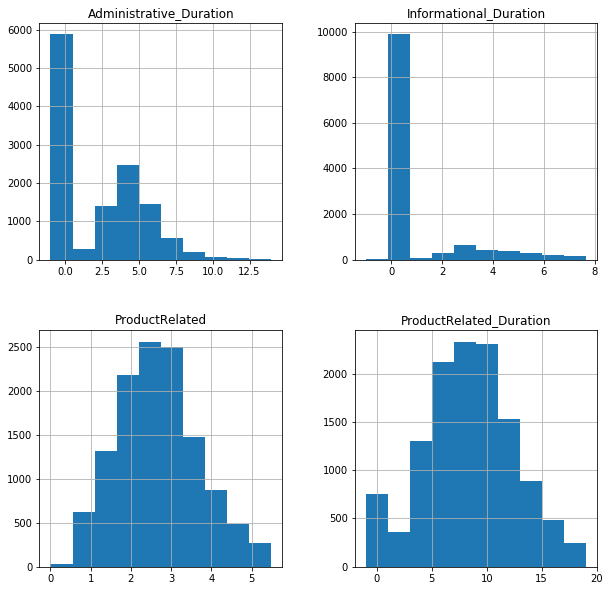

In [62]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
data.hist(column=['ProductRelated_Duration','Informational_Duration','Administrative_Duration','ProductRelated'],ax=ax)

EXPLORATORY DATA ANALYSIS

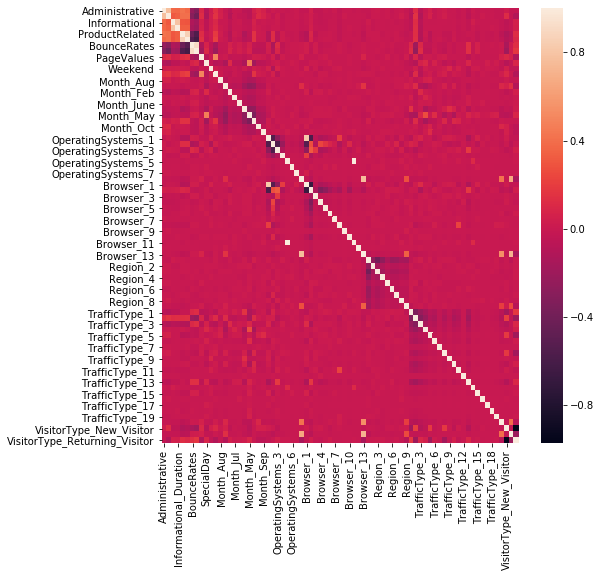

In [75]:
#Impractical to use a heat map and find out positively and negatively correlated features 
#and most of the color lies between +0.3 and -0.3
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
sns.heatmap(data.corr(),ax=ax)



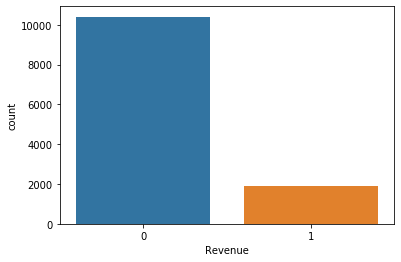

In [76]:
sns.countplot(data.Revenue)

one indicates the purchase of a product online and zero indicates the  opposite of it.This clearly tell us that the data is imbalanced.Number of Zeros are far greater than the number of ones.Running the  model on this data produces biased results for the majority level that is zero.In order to eliminate this Undersampling of the majority class is done .

In [77]:
minority_len=len(data[data['Revenue']==1])
print(minority_len)
majority_indices=data[data['Revenue']==0].index
print(len(majority_indices))

1908
10408


In [78]:
random_majority_indice=np.random.choice(majority_indices,minority_len,replace=False)
minority_class_indices=data[data['Revenue']==1].index

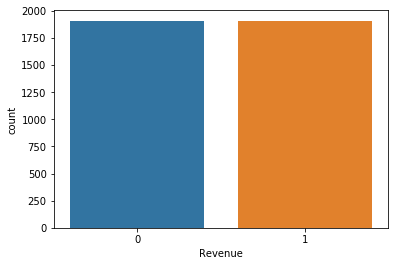

In [79]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indice])
data1=data.loc[under_sample_indices]
sns.countplot(x='Revenue',data=data1)

In [83]:
X=data1.loc[:,data.columns!='Revenue']
y=data1.loc[:,data.columns=='Revenue']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [85]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [111]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model1.predict(X_test)

C:\Users\parameshwari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [122]:
from sklearn.metrics import roc_auc_score
y_pred_prob=model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))

0.8898927211482133


In [123]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       569
           1       0.84      0.75      0.79       576

    accuracy                           0.80      1145
   macro avg       0.80      0.80      0.80      1145
weighted avg       0.80      0.80      0.80      1145

[[486  83]
 [145 431]]


In [124]:
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

0.8244103332085362
0.8008733624454148


With Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier
model_RFC=RandomForestClassifier()
model_RFC.fit(X_train,y_train)
pred2=model_RFC.predict(X_test)
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

C:\Users\parameshwari\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.86      0.85      0.86       569
           1       0.86      0.87      0.86       576

    accuracy                           0.86      1145
   macro avg       0.86      0.86      0.86      1145
weighted avg       0.86      0.86      0.86      1145

[[485  84]
 [ 77 499]]


In [110]:
print(model_RFC.score(X_train,y_train))
print(model_RFC.score(X_test,y_test))


1.0
0.8550218340611354


In [128]:
y_pred_prob_rfc=model_RFC.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob_rfc))

0.9164317272017185


Random Forest performs better than Logistic regression based on obserivng the score of Training,testing and Area under the scores



